100%|██████████| 50/50 [00:05<00:00,  8.74it/s]


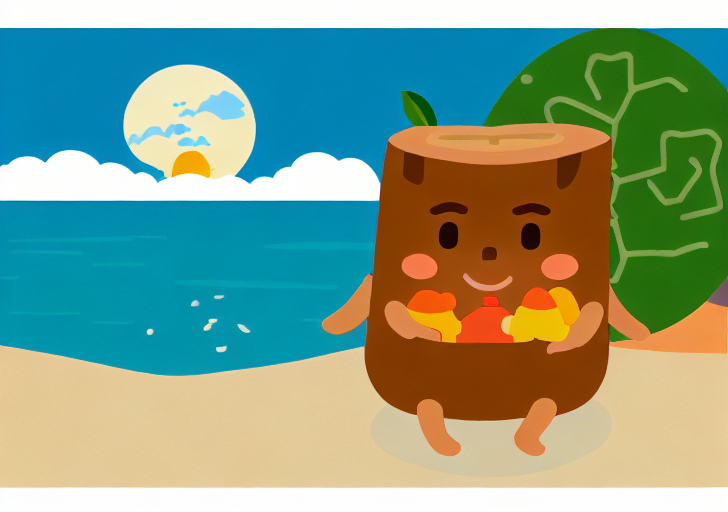

In [68]:
from diffusers import StableDiffusionPipeline
import torch
from safetensors.torch import load_file

# Provide the path to the folder containing the model config and weights,
# not directly to a .safetensors checkpoint file.
model_dir = 'runwayml/stable-diffusion-v1-5'

pipeline = StableDiffusionPipeline.from_pretrained(
    model_dir, 
    torch_dtype=torch.float16, 
    local_files_only=True
)
pipeline.to("cuda")

# Disable NSFW filter

pipeline.safety_checker = None
pipeline.requires_safety_checking = False

pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="animals-10.safetensors")
pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="nature-10.safetensors")
pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="play-10.safetensors")
pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="saekdam_ocean-10.safetensors")
pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="urban-10.safetensors")
pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="saekdam_space-10.safetensors")
pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="saekdam-10.safetensors")
pipeline.load_lora_weights(r"C:\Users\013\Desktop\ml_image_server\saekdam_style", weight_name="gru-10.safetensors")


prompt = "groot, saesoon, moon, beach, playing, saekdam style, flat design, wall painting"


image = pipeline(
    prompt,
    height=512,  # 기본값 512
    width=728,   # 기본값 512
).images[0]


torch.cuda.empty_cache()

image

